In [1]:
# install latest dev of CyberGIS library
!rm -rf /tmp/cybergis && \
    rm -rf /opt/conda/envs/hydro-py3-new/lib/python3.7/site-packages/cybergis && \
    git clone https://github.com/cybergis/Jupyter-xsede.git --branch fz_general /tmp/cybergis && \
    cp -r /tmp/cybergis/cybergis /opt/conda/envs/hydro-py3-new/lib/python3.7/site-packages && \
    cd ~ && \
    rm -rf /tmp/cybergis \
    #rm -rf /home/jovyan/work/Downloads/1f3f310af8364d2aa3e6a9459152a21c && \
    #cd /home/jovyan/work/workspace/ && rm -rf * && \
    echo CyberGIS installed. Please restart Kernel.

Cloning into '/tmp/cybergis'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 1229 (delta 36), reused 36 (delta 20), pack-reused 1175
Receiving objects: 100% (1229/1229), 22.01 MiB | 15.67 MiB/s, done.
Resolving deltas: 100% (849/849), done.


In [1]:
import os
import sys
import logging
os.environ["USER"]=""
from cybergis.general import *
logger.setLevel(logging.INFO)

### Unzip model package

In [2]:
#Unzip model file
resource_id = '1f3f310af8364d2aa3e6a9459152a21c'
model_folder_name = "SummaModel_ReynoldsAspenStand_StomatalResistance_sopron"
#instance = utils.download_model_instance(resource_id)
content_folder = "./Downloads/{}/{}/data/contents".format(resource_id, resource_id)
model_source_folder_path = os.path.abspath(os.path.join(content_folder, model_folder_name))
file_manger_rel_path = "settings/summa_fileManager_riparianAspenSimpleResistance.txt"
!cd {content_folder} && unzip -o {model_folder_name}.zip

Archive:  SummaModel_ReynoldsAspenStand_StomatalResistance_sopron.zip
  inflating: SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/data/forcingData/forcing_above_aspen.nc  
  inflating: SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/data/reynolds_geojson_latlon.geojson  
  inflating: SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/data/validationData/ReynoldsCreek_eddyFlux.nc  
  inflating: SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/installTestCases_local.sh  
  inflating: SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/settings/GENPARM.TBL  
  inflating: SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/settings/meta/dos2unix.sh  
  inflating: SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/settings/meta/Model_Output.txt  
  inflating: SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/settings/meta/summa_zBasinModelVarMeta.txt  
  inflating: SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/settings/meta/summa_zBa

### "Install" SUMMA model on Jupyter server (fix broken path in summa file_manager)

In [3]:
!cd {model_source_folder_path} && chmod +x ./installTestCases_local.sh
!cd {model_source_folder_path} && ./installTestCases_local.sh

TestCases installed


### Use PySumma to configure model parameters

In [4]:
from pysumma import Simulation

# path to the SUMMA filemanager file on Jupyter
file_manager = os.path.join(model_source_folder_path, file_manger_rel_path)

# Create pySUMMA Simulation Object
executable = ""
S = Simulation(executable, file_manager)

# Configure the model
S.decisions['simulStart'].value = "2006-07-01 00:00"
S.decisions['simulFinsh'].value = "2007-08-20 00:00"
S.decisions['stomResist'].value = 'BallBerry'
# Save configiuration to disk
S._write_configuration()
print(S)

Executable path: 
Simulation status: Initialized
File manager configuration:
'SUMMA_FILE_MANAGER_V1.0'    ! filemanager_version
'/home/jovyan/work/Downloads/1f3f310af8364d2aa3e6a9459152a21c/1f3f310af8364d2aa3e6a9459152a21c/data/contents/SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/settings/'    ! settings_path
'/home/jovyan/work/Downloads/1f3f310af8364d2aa3e6a9459152a21c/1f3f310af8364d2aa3e6a9459152a21c/data/contents/SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/data/forcingData/'    ! input_path
'/home/jovyan/work/Downloads/1f3f310af8364d2aa3e6a9459152a21c/1f3f310af8364d2aa3e6a9459152a21c/data/contents/SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/output/'    ! output_path
'summa_zDecisions_riparianAspenSimpleResistance.txt'    ! decisions_path
'meta/summa_zTimeMeta.txt'    ! meta_time
'meta/summa_zLocalAttributeMeta.txt'    ! meta_attr
'meta/summa_zCategoryMeta.txt'    ! meta_type
'meta/summa_zForceMeta.txt'    ! meta_force
'meta/summa_zLocalParamMeta.t

### Submit model to HPC resources using CyberGIS-Jupyter tool

In [5]:
from cybergis.general import summaUI
local_workspace_path = os.path.abspath("./workspace")
! mkdir -p {local_workspace_path}

s = summaUI(model_source_folder_path, file_manger_rel_path, local_workspace_path, username="my_username", machine="Comet", user_pw="my_password")




In [6]:
s.runSumma()

2019-10-21 20:22:36,757 SSH logged into comet.sdsc.edu as user flu8
2019-10-21 20:22:36,767 Uploading /home/jovyan/work/workspace/Summa_1571689354_8ec0b390 to /home/flu8
2019-10-21 20:22:40,937 Submitting Job sbatch.sh to queue
2019-10-21 20:22:45,402 Q
2019-10-21 20:22:49,238 R
2019-10-21 20:22:52,962 R
2019-10-21 20:22:56,618 R
2019-10-21 20:23:00,332 R
2019-10-21 20:23:04,033 U
2019-10-21 20:23:08,017 U
2019-10-21 20:23:11,690 Job completed: Summa_1571689354_8ec0b390; 27517697
2019-10-21 20:23:11,692 Downloading /home/flu8/Summa_1571689354_8ec0b390/SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/output to /home/jovyan/work/workspace/Summa_1571689354_8ec0b390
2019-10-21 20:23:15,479 Downloading /home/flu8/Summa_1571689354_8ec0b390/SummaModel_ReynoldsAspenStand_StomatalResistance_sopron/slurm-27517697.out to /home/jovyan/work/workspace/Summa_1571689354_8ec0b390
2019-10-21 20:23:15,798 Done


### Visualization

In [7]:
summa_output = os.path.join(local_workspace_path, 
                            "{}/output".format(s.job_local_id), 
                            "vegImpactsTranspire_output_test_timestep.nc")
print(summa_output)

/home/jovyan/work/workspace/Summa_1571689354_8ec0b390/output/vegImpactsTranspire_output_test_timestep.nc


In [8]:
import xarray as xr
output_info = xr.open_dataset(summa_output)
output_info

<xarray.Dataset>
Dimensions:                    (gru: 1, hru: 1, ifcSoil: 9, ifcToto: 14, midSoil: 8, midToto: 13, time: 9961)
Coordinates:
  * time                       (time) datetime64[ns] 2006-07-01 ... 2007-08-20
  * hru                        (hru) int32 1
Dimensions without coordinates: gru, ifcSoil, ifcToto, midSoil, midToto
Data variables:
    pptrate                    (time, hru) float64 ...
    airtemp                    (time, hru) float64 ...
    hruId                      (hru) int32 ...
    basin__SurfaceRunoff       (time, gru) float64 ...
    basin__ColumnOutflow       (time, gru) float64 ...
    basin__AquiferStorage      (time, gru) float64 ...
    basin__AquiferRecharge     (time, gru) float64 ...
    basin__AquiferBaseflow     (time, gru) float64 ...
    basin__AquiferTranspire    (time, gru) float64 ...
    averageInstantRunoff       (time, gru) float64 ...
    averageRoutedRunoff        (time, gru) float64 ...
    nSnow                      (time, hru) int32 ..

/opt/conda/envs/hydro-py3-new/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


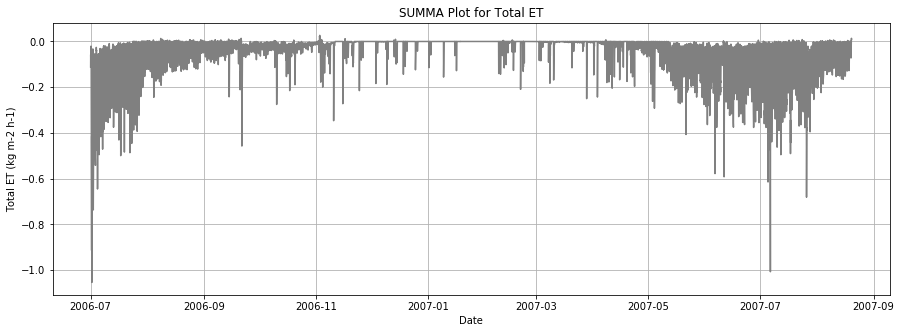

In [9]:
import matplotlib.pyplot as plt
x = output_info['time']
y = (output_info['scalarCanopyTranspiration'] + \
     output_info['scalarCanopyEvaporation'] + \
     output_info['scalarGroundEvaporation'])*3600

plt.figure(figsize=(15, 5))
plt.plot(x, y, color='grey', linestyle='solid', markersize=0)

    # Get the current axis of the plot and
    # set the x and y-axis labels
ax = plt.gca()
ax.set_ylabel("Total ET (kg m-2 h-1)")
ax.set_xlabel('Date')
ax.grid(True)

ax.set_title('SUMMA Plot for Total ET')
output_info.close()

### Save results back to HydroShare (optional)

In [10]:
from hs_restclient import HydroShare, HydroShareAuthOAuth2
import json
oauth = json.loads(os.environ["HS_AUTH"])
auth = HydroShareAuthOAuth2(oauth[1], "", token=oauth[0])
hs = HydroShare(auth=auth)

In [11]:
resource_id = hs.createResource("CompositeResource", "Summa results test", resource_file=summa_output)
from IPython.display import display, Markdown
display(Markdown('[https://www.hydroshare.org/resource/{resource_id}/](https://www.hydroshare.org/resource/{resource_id}/)'.format(resource_id=resource_id)))

[https://www.hydroshare.org/resource/6d36f911f7804b91888904aae3375ddc/](https://www.hydroshare.org/resource/6d36f911f7804b91888904aae3375ddc/)

### Done